# 1. Libraries

In [1]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

# 2. Dataset

In [2]:
transactions = pd.read_csv("./creditcard.csv")  # Loads the csv into a Pandas table
pd.set_option('display.max_columns', None)      # To show all columns on the screen
transactions   

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 3. Analysis

### 3.1. Correlation matrix

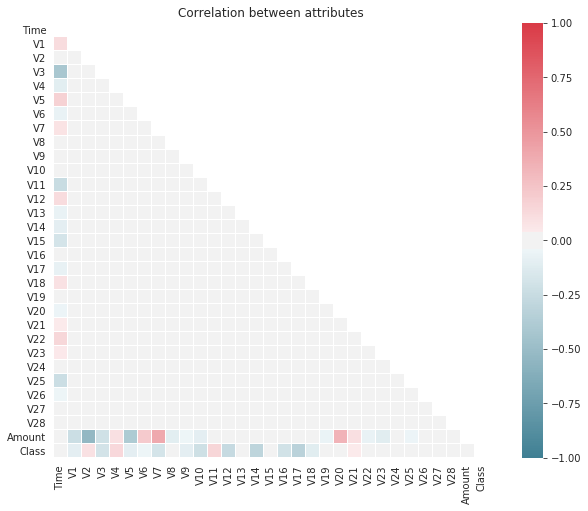

In [39]:
# Gets the correlation matrix
corr = transactions.corr()

# Mask to display only half of the correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# This is to change the colors of the correlation matrix
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Here, a seaborn.heatmap is used to display the correlation matrix
# Both mask and cmap previously defined are pass as parameters to the function
with sns.axes_style("white"):
    plt.subplots(figsize=(12, 8))
    sns.heatmap(transactions.corr(), cmap=cmap, mask=mask, vmax=1.0, vmin=-1.0, center=0, linewidths=.01, square=True)
    plt.title('Correlation between attributes')

### 3.2. Adding new features

In [3]:
# The amount feature is quite correlated with several other features. Obtaining new features from such
# relations could give good results in classifying.

# List of features correlated with Amount
features = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V19','V20','V21','V22','V23','V25']

for feature in features:
    # The .replace(0, 0.001) statement is to avoid division by zero
    transactions[feature + '_Amount'] = transactions[feature]/transactions['Amount'].replace(0, 0.00000001)
    
transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,V1_Amount,V2_Amount,V3_Amount,V4_Amount,V5_Amount,V6_Amount,V7_Amount,V8_Amount,V9_Amount,V10_Amount,V19_Amount,V20_Amount,V21_Amount,V22_Amount,V23_Amount,V25_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.009088,-0.000486,0.016952,0.009211,-0.002261,0.003090,0.001601,0.000660,0.002431,0.000607,0.002700,0.001680,-0.000122,0.001857,-0.000738,0.000859
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.443070,0.098941,0.061889,0.166600,0.022311,-0.030617,-0.029295,0.031636,-0.094954,-0.062072,-0.054194,-0.025681,-0.083931,-0.237425,0.037654,0.062145
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.003587,-0.003539,0.004683,0.001003,-0.001329,0.004755,0.002090,0.000654,-0.004000,0.000548,-0.005973,0.001386,0.000655,0.002038,0.002402,-0.000865
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-0.007824,-0.001500,0.014518,-0.006990,-0.000083,0.010099,0.001924,0.003056,-0.011231,-0.000445,-0.009981,-0.001685,-0.000877,0.000043,-0.001541,0.005242
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.016549,0.012541,0.022128,0.005758,-0.005818,0.001371,0.008472,-0.003865,0.011684,0.010760,0.011480,0.005837,-0.000135,0.011406,-0.001964,-0.002943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-15.430023,13.080240,-12.772446,-2.683968,-6.966848,-3.385503,-6.387293,9.487447,2.486270,5.657364,-0.886909,1.916661,0.277213,0.145278,1.317506,1.865983
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.029560,-0.002222,0.082091,-0.029794,0.035023,0.042695,0.000981,0.011895,0.023590,-0.039368,-0.062346,0.002405,0.008641,0.037289,0.000503,-0.024471
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.028279,-0.004438,-0.047873,-0.008218,0.038752,0.044656,-0.004373,0.010436,0.006371,-0.007142,-0.008504,0.000021,0.003418,0.008518,-0.000552,0.003915
284805,172788.0,-0.240440,0.530483,0.702510,0.

### 3.3. Generic variables to print the histograms

In [5]:
# This variable excludes the labels from the data "transactions["Class"]
x_data = transactions.drop(['Time','Class'], axis=1)

# This variable excludes the non-fraud examples
x_fraud = x_data[transactions['Class'] == 1]

# This variable excludes the fraud examples
x_nonfraud = x_data[transactions['Class'] == 0]

# The density distribution diagrams are shown in rows of 3 columns
ncols = 3

# The number of rows depends on the number of columns and the total of variables
nrows = math.ceil(transactions.shape[1]/ncols)

### 3.4. Density distributions

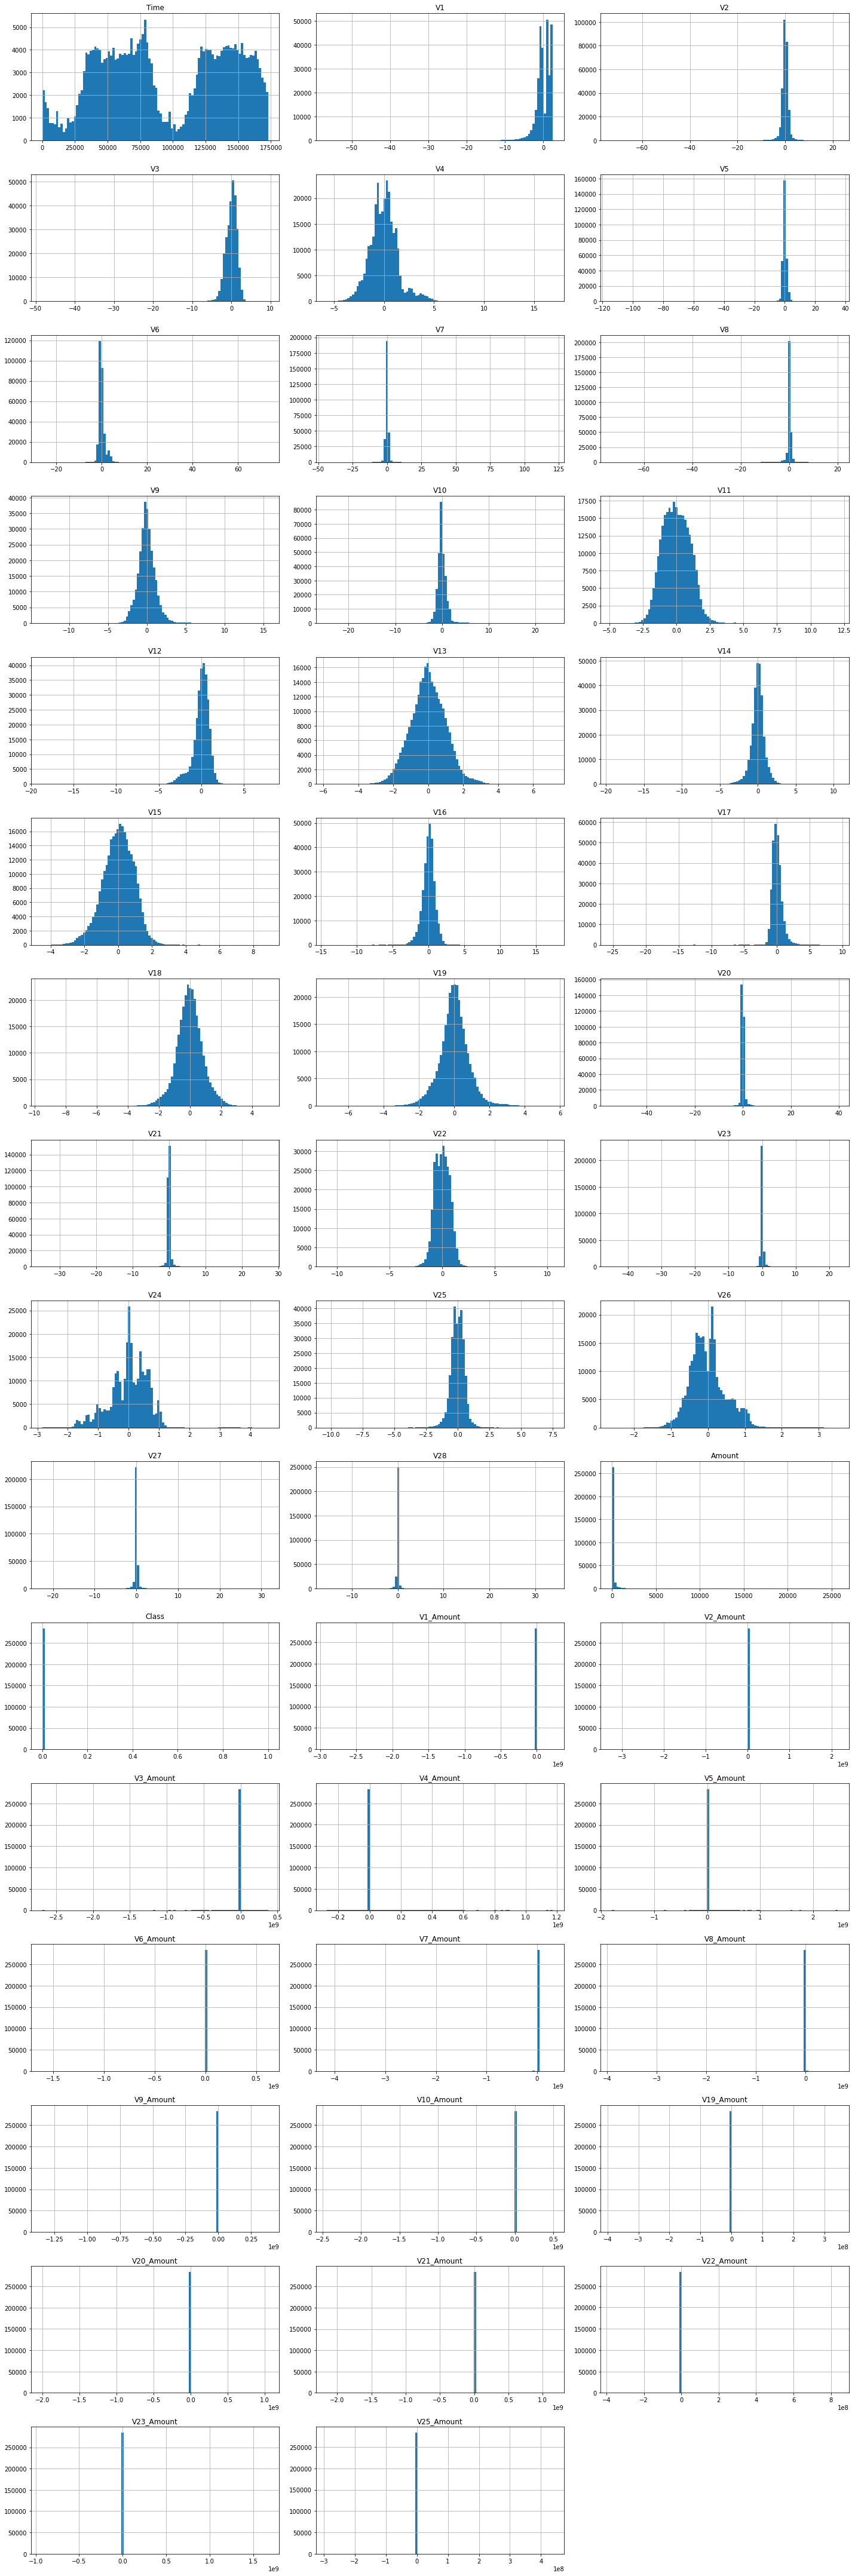

In [7]:
# This creates a figure and defines the size of the histograms
fig=plt.figure(figsize=(20,60))

# This prints each of the histograms in fig
for i, var_name in enumerate(transactions):
    ax=fig.add_subplot(nrows, ncols, i+1)
    transactions[var_name].hist(bins=100,ax=ax)
    ax.set_title(var_name)
    
# Improves appearance a bit.
fig.tight_layout()

# Displays the figure on the screen
plt.show()

### 3.5. Fraud density distributions

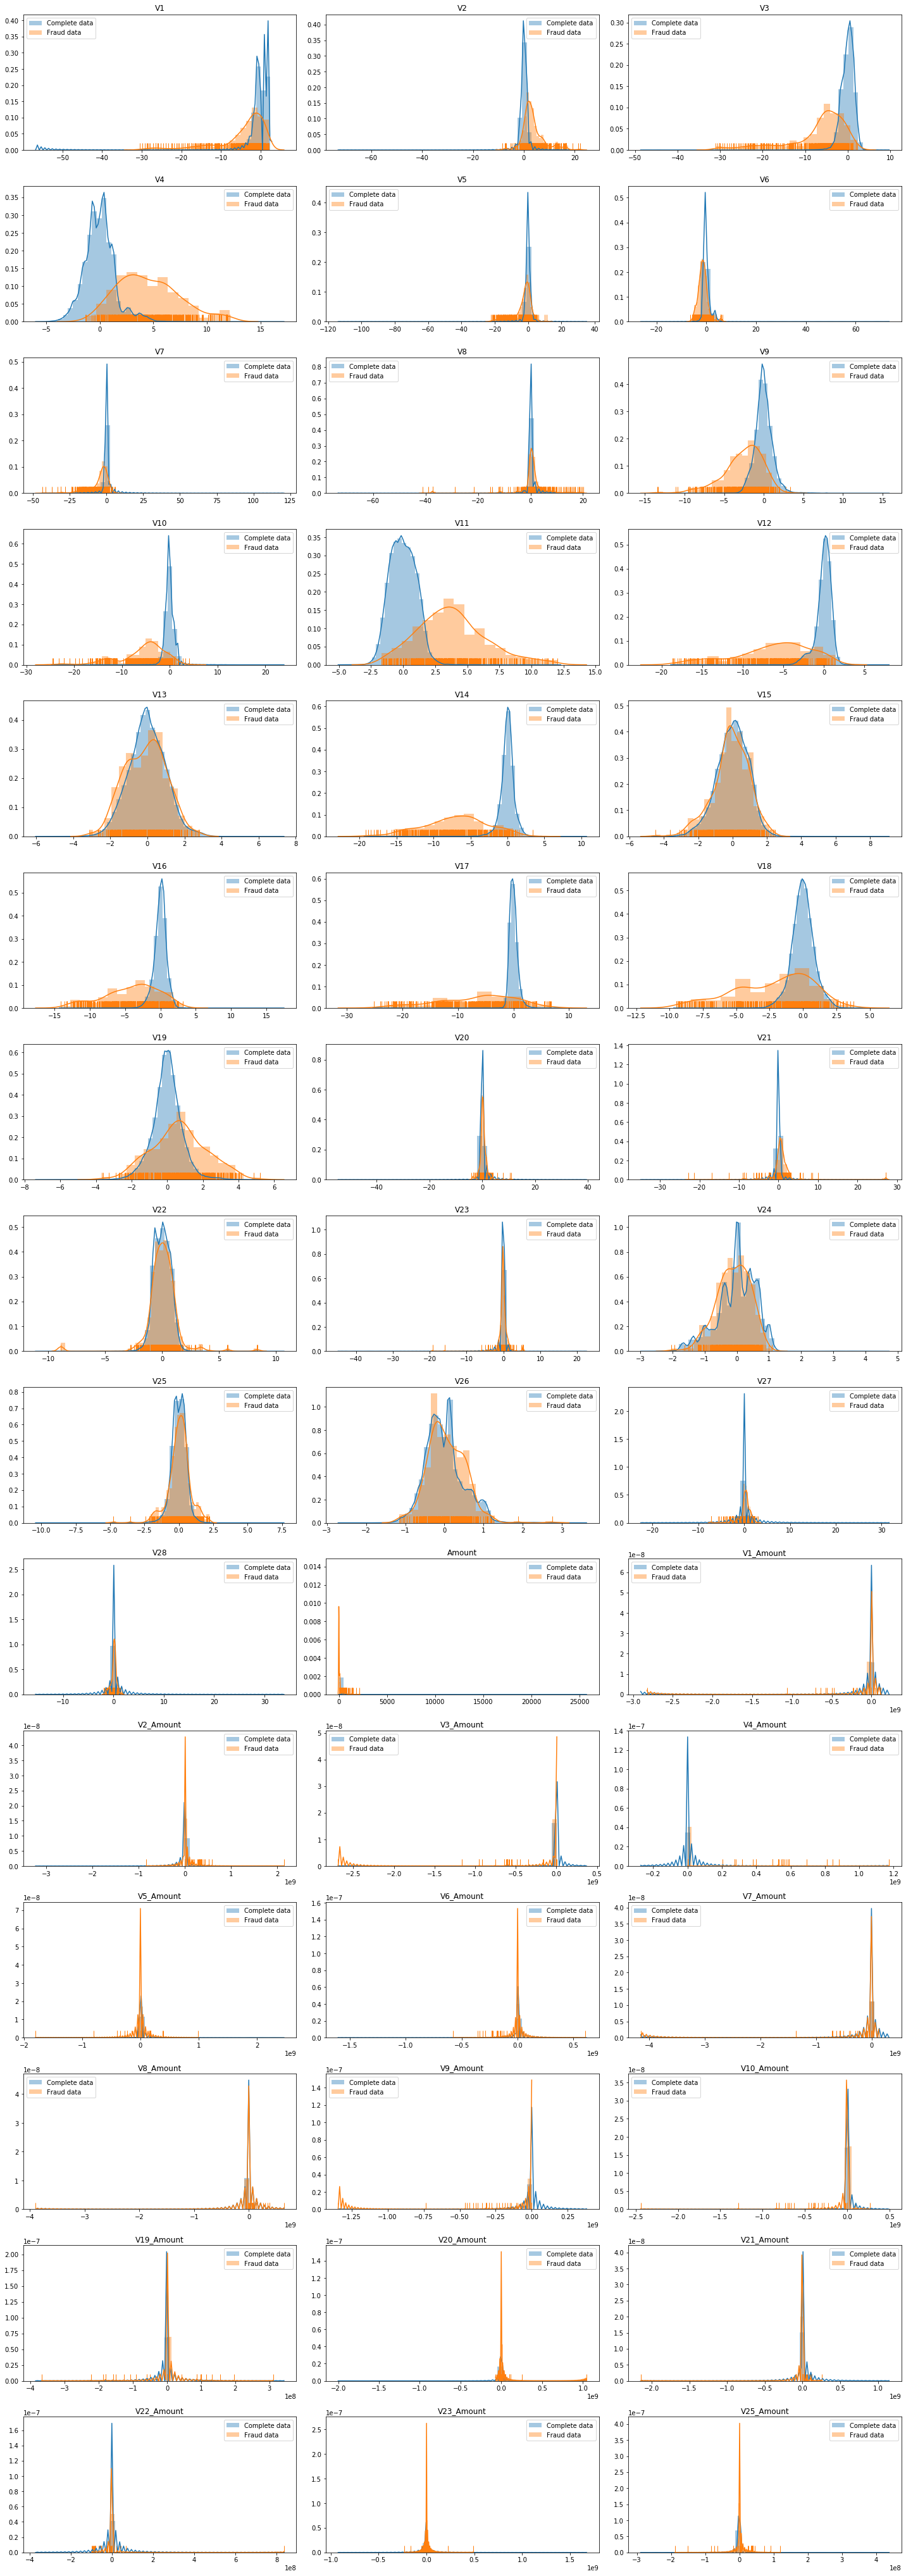

In [8]:
# This creates a figure and defines the size of the histograms
fig=plt.figure(figsize=(20,60))

# This prints each of the histograms in fig
for i, var_name in enumerate(x_data):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.distplot(x_data[var_name], label='Complete data')
    sns.distplot(x_fraud[var_name], label='Fraud data', rug=True)
    #ax.plot(x_fraud[var_name], [0.01]*len(x_fraud), '|', color='k')
    ax.set(title=var_name, xlabel=None)
    plt.legend()
    
# Improves appearance a bit.
fig.tight_layout()

# Displays the figure on the screen
plt.show()

### 3.6. Non-fraud density distributions

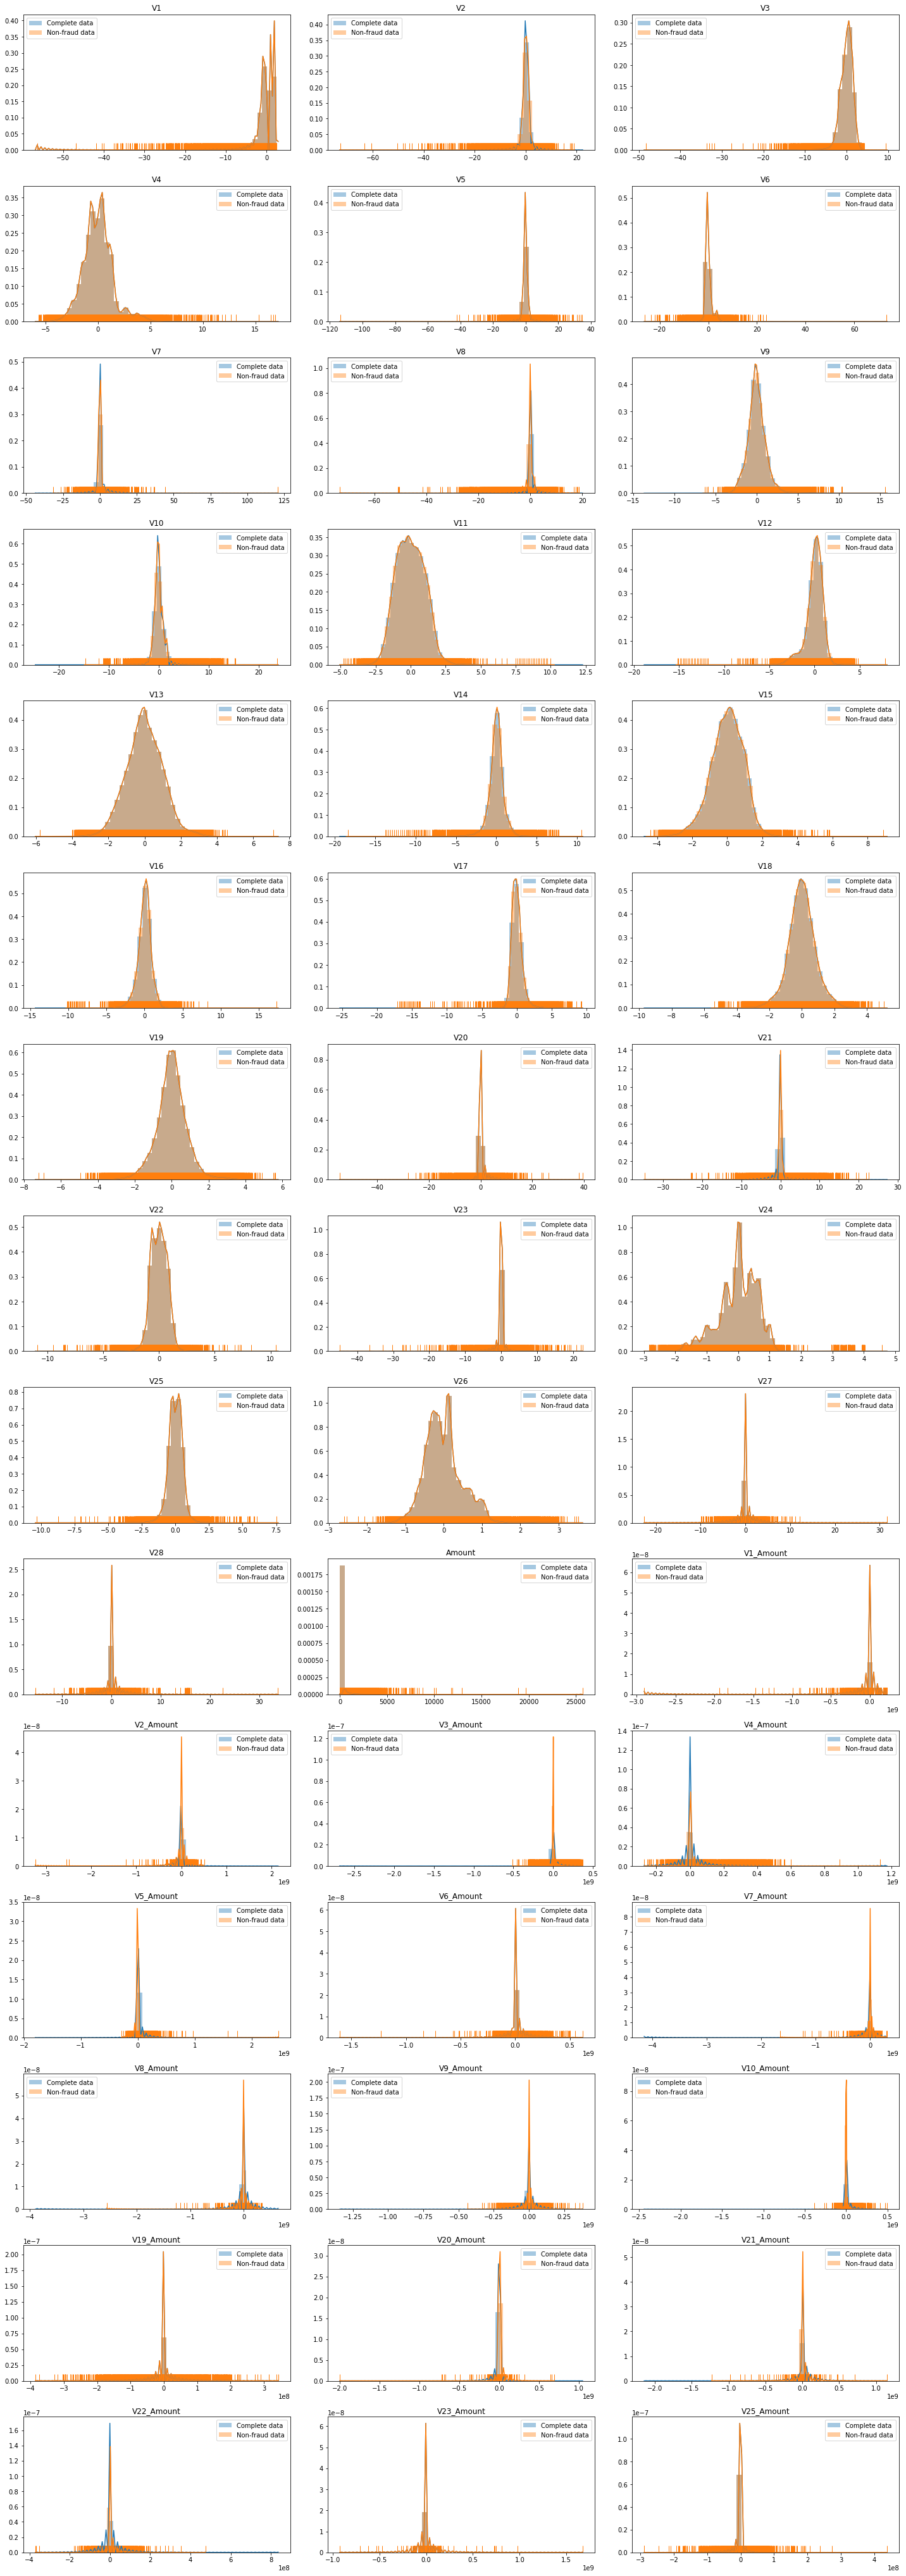

In [9]:
# This creates a figure and defines the size of the histograms
fig=plt.figure(figsize=(20,60))

# This prints each of the histograms in fig
for i, var_name in enumerate(x_data):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.distplot(x_data[var_name], label='Complete data')
    sns.distplot(x_nonfraud[var_name], label='Non-fraud data', rug=True)
    #ax.plot(x_nonfraud[var_name], [0.01]*len(x_nonfraud), '|', color='k')
    ax.set(title=var_name, xlabel=None)
    plt.legend()
    
# Improves appearance a bit.
fig.tight_layout()

# Displays the figure on the screen
plt.show()

### 3.7. Fraud VS Non-fraud density distributions

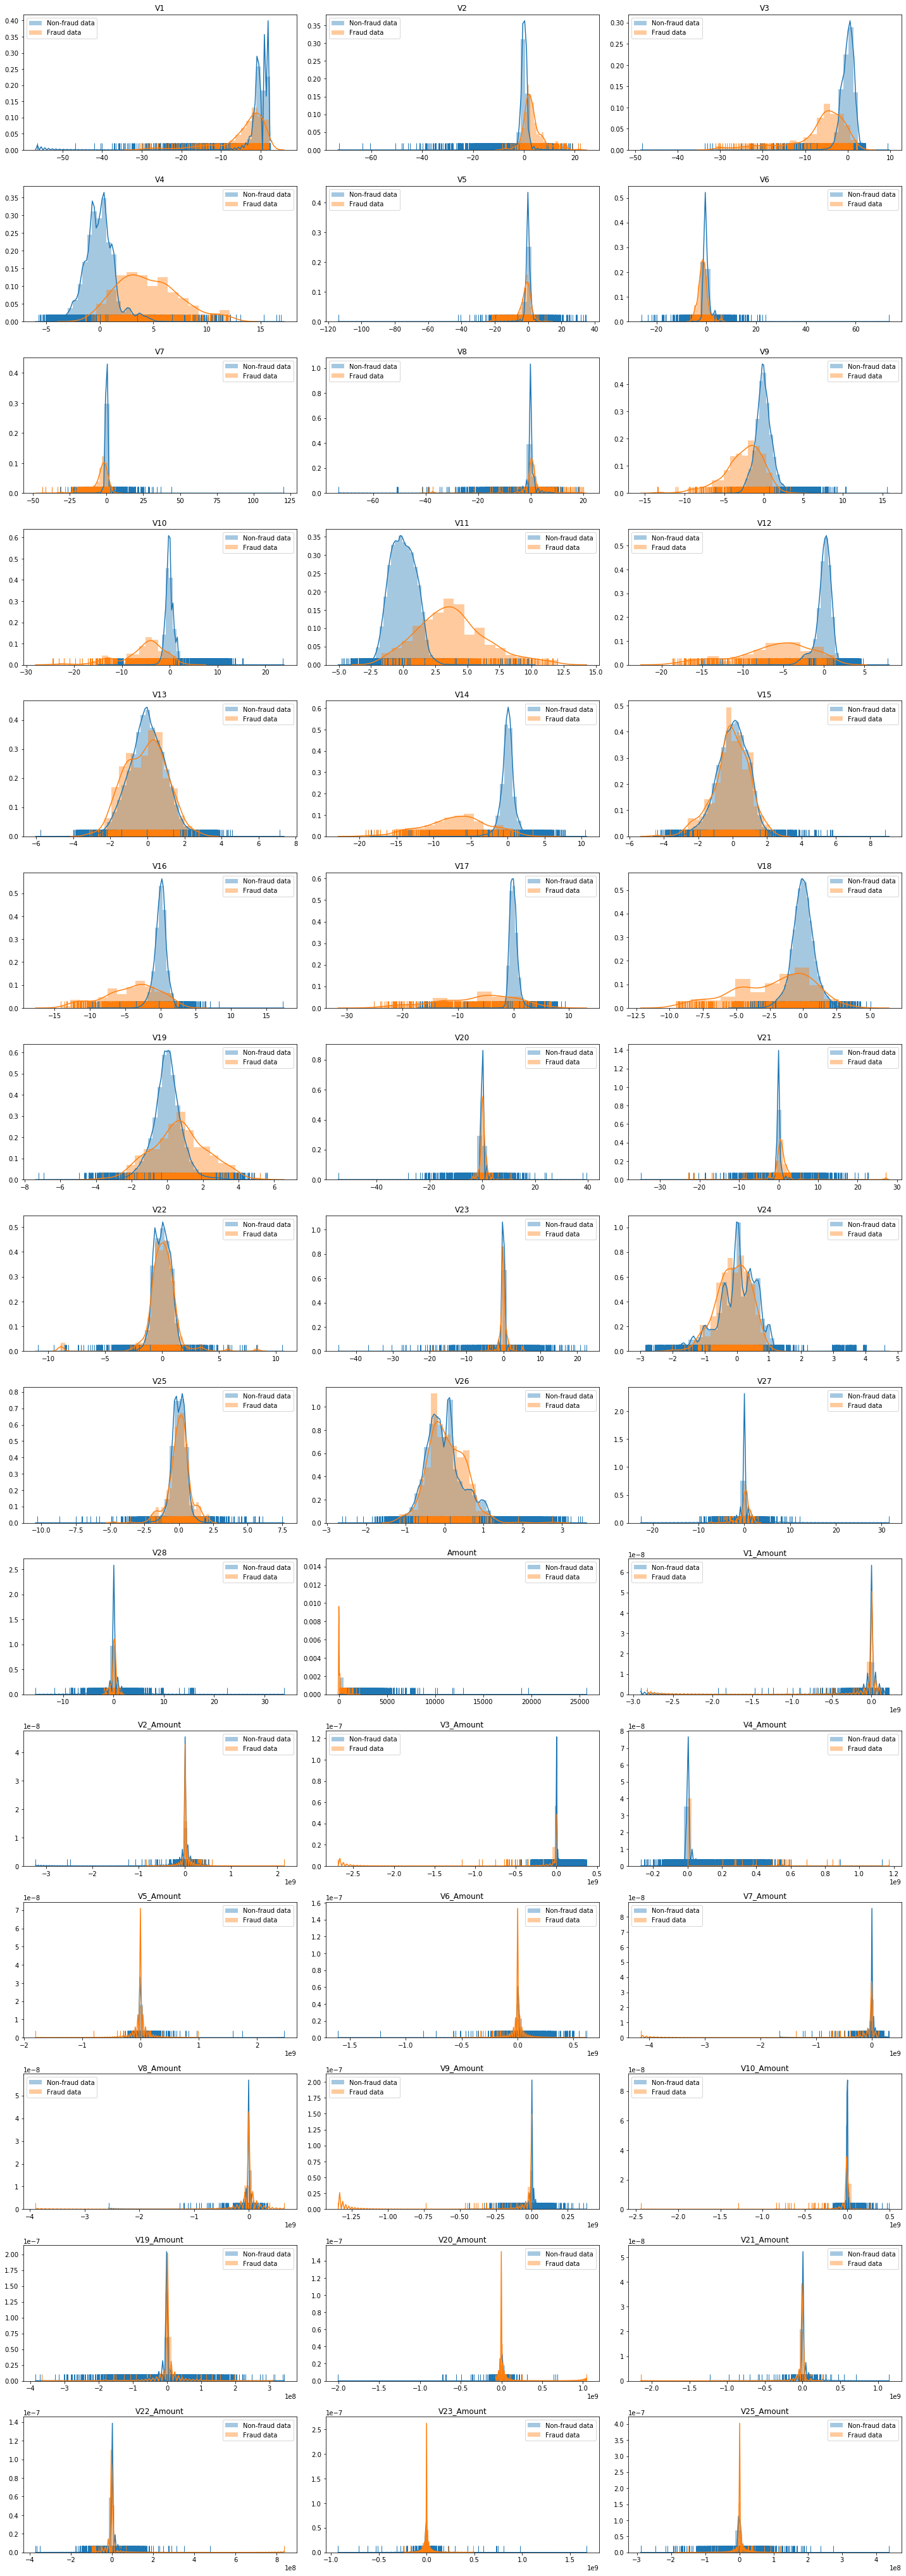

In [10]:
# This creates a figure and defines the size of the histograms
fig=plt.figure(figsize=(20,60))

# This prints each of the histograms in fig
for i, var_name in enumerate(x_data):
    ax=fig.add_subplot(nrows, ncols, i+1)
    sns.distplot(x_nonfraud[var_name], label='Non-fraud data', rug=True)
    sns.distplot(x_fraud[var_name], label='Fraud data', rug=True)
    #ax.plot(x_fraud[var_name], [0.01]*len(x_fraud), '|', color='k')
    ax.set(title=var_name, xlabel=None)
    plt.legend()
    
# Improves appearance a bit.
fig.tight_layout()

# Displays the figure on the screen
plt.show()

# 4. Functions to split the data set

### 4.1. To split into Training, Cross-validation, and Test sets

In [4]:
# Receives a dataframe and splits it into training and test sets, 
# taking into account the percentage of samples for test for each class.

# percent: Dictionary that indicates the corresponding percentage for test for each class.
def split_by_class(data_set, percent):
    training_set = pd.DataFrame()   # Training set
    test_set = pd.DataFrame()       # Test set
    
    # ------------------------------------ #
    # The dataframe is splitted by classes #
    # ------------------------------------ #
    by_class = data_set.groupby('Class')

    # ----------------------------------------------------- #
    # Training and test samples are obtained for each class #
    # ----------------------------------------------------- #
    for group, data in by_class:
        if(percent[group] != 1):
            tmp_train, tmp_test = train_test_split(data, test_size=percent[group])
            training_set = training_set.append(tmp_train)
            test_set = test_set.append(tmp_test)
        else:
            test_set = test_set.append(data)
            
    return training_set, test_set

### 4.2. To split data (x) and labels (y)

In [5]:
def split_labels(data_set):
    y_data = data_set['Class']
    x_data = data_set.drop(['Class'], axis=1)
    return x_data, y_data

# 5. Main functions

### 5.1. To estimate the Probability Distribution Function (PDF)

In [6]:
# Calculates the Probability Distribution Function (PDF)
# for a specific data set

def get_model(data):
    mu = data.mean()                                 # Mean
    std = data.std()                                 # Covariance matrix    
    return norm(mu, std)     # Multivariate Gaussian Distribution

### 5.2. To calculate Precision, Recall, and F1 Score

In [7]:
# Receives the predictions calculated by the model, and receives the ground 
# truth labels, and calculates the F1 score. It also returns precision and 
# recall, as well as the false positives and false negatives.

def precision_recall_fscore(y_Vals, pedictions):
    tp = sum(np.logical_and(pedictions == 1, y_Vals == 1))    # True positives
    tn = sum(np.logical_and(pedictions == 0, y_Vals == 0))    # True negatives
    fp = sum(np.logical_and(pedictions == 1, y_Vals == 0))    # False positives
    fn = sum(np.logical_and(pedictions == 0, y_Vals == 1))    # False negatives
    
    if tp != 0:                                               
        prec = tp/(tp+fp) if tp+fp else 1                     # Precision
        rec = tp/(tp+fn) if tp+fn else 1                      # Recall
    else:
        prec = 1/(1+fp)                                       # Precision
        rec = 1/(1+fn)                                        # Recall
    
    f1 = (2*prec*rec)/(prec+rec)                              # F1 Score
    
    return prec, rec, f1, tp, tn, fp, fn

### 5.3. To select the best threshold

In [8]:
# Receives the probabilities calculated by the Probability Distribution Function (PDF),
# and receives the ground truth labels, and calculates epsilon value from F1 Score.

def select_threshold(y_Vals, probs):
    
    bestEpsilon = 0
    bestF1 = 0
    
    min_prob = np.min(probs)                # Lowest probability calculated by the PDF in the set
    max_prob = np.max(probs)                # Highest probability calculated by the PDF in the set
    stepsize = (max_prob - min_prob)/1000;  # Arbitrarily defined stepsize
    
    epsilon = min_prob                      # Epsilon starts at min_prob
    
    while epsilon <= max_prob:    
        pred = probs < epsilon              # Predictions (Fraud = True, Not-fraud = False)
        
        # F1 Score
        _, _, F1, _, _, _, _ = precision_recall_fscore(y_Vals, pred)
        
        if F1 > bestF1:                     # This condition updates the epsilon value according to the F1 score
            bestF1 = F1                      
            bestEpsilon = epsilon
        
        epsilon+=stepsize
                
    return bestEpsilon

### 5.4. To calculate accuracies

In [9]:
# Receives the predictions obtained by the model, and receives the ground truth labels, 
# and calculates the accuracies for fraud and non-fraud samples, as well as a 'F1 accuracy'.

def calculate_accuracy(y_Vals, pedictions):

    _, _, _, tp, tn, fp, fn = precision_recall_fscore(y_Vals, pedictions)

    acc = 100*sum(pedictions == y_Vals)/len(y_Vals)
    fraud_acc = (tp*100)/(tp+fn) if tp+fn else 100
    nonfraud_acc = (tn*100)/(tn+fp) if tn+fp else 100
    f1_acc = 2*fraud_acc*nonfraud_acc/(fraud_acc+nonfraud_acc)
    
    return acc, fraud_acc, nonfraud_acc, f1_acc

### 5.5. To print the results

In [10]:
def results(pedictions, y_Vals, set_type):
    prec, rec, f1, tp, tn, fp, fn = precision_recall_fscore(y_Vals, pedictions)
    acc, fraud_acc, nonfraud_acc, f1_acc = calculate_accuracy(y_Vals, pedictions)
    print('\n------------------------------------------')
    print('                ' + set_type + '             ')
    print('------------------------------------------')
    print('True Positives:     ' + str(tp))
    print('True Negatives:     ' + str(tn))
    print('False Positives:    ' + str(fp))
    print('False Negatives:    ' + str(fn))
    print('------------------------------------------')
    #print('Total Accuracy:     ' + str(acc_train) + "%")
    print('Accuracy Fraud:     ' + str(fraud_acc) + "%")
    print('Accuracy Non-Fraud: ' + str(nonfraud_acc) + "%")
    print('F1 Accuracy:        ' + str(f1_acc) + "%")
    print('------------------------------------------')
    print('Precision:          ' + str(prec))
    print('Recall:             ' + str(rec))
    print('F1 Score:           ' + str(f1))

### 5.6. To apply the Density Estimation algorithm (step by step)

In [11]:
# This function receives the entire dataset and applies each of the phases 
# of the Density Estimation model to it. It returns the F1 Accuracy

# It was written primarily to reduce code.

def apply_model(data, print_results):
    
    # 1. ----- Splitting data into training, cross-validation, and test sets
    
    percent = {0:0.1, 1:1.0} # 10% non-fraud / 100% fraud for test
    training_set, test_set = split_by_class(data, percent)

    percent = {0:0.5, 1:0.5} # 50% non-fraud / 50% fraud for cross-validation
    cv_set, test_set = split_by_class(test_set, percent)
    
    # 2. ----- Separating data and labels
    
    x_training, y_training = split_labels(training_set)
    x_cv, y_cv = split_labels(cv_set)
    x_test, y_test = split_labels(test_set)
    
    # 3. ----- The Probability Distribution Function (PDF) is estimated
    
    model = get_model(x_training)
    
    # 4. ----- Distribution probabilities for each of the sets are calculated

    probs_train = np.prod(model.pdf(x_training), axis=1)    
    probs_cv = np.prod(model.pdf(x_cv), axis=1)
    probs_test = np.prod(model.pdf(x_test), axis=1)
    
    # 5. ----- The best epsilon value is calculated (Cross-validation)
    
    epsilon = select_threshold(y_cv, probs_cv)
    
    # 6. ----- The predictions for each of the sets are obtained

    pred_training = probs_train < epsilon
    pred_cv = probs_cv < epsilon
    pred_test = probs_test < epsilon
    
    # 7. ----- The accuracies are calculated
    
    _, _, _, f1_acc = calculate_accuracy(y_cv, pred_cv)
    
    # 8. ----- The results are printed
    
    if print_results:
        results(pred_training, y_training, 'Training')
        results(pred_cv, y_cv, 'Cross-validation')
        results(pred_test, y_test, 'Test')
        
    return f1_acc

# 6. Feature Selection

#### This method for feature selection depends on the initial set of features taken, as well as the order the features are tested. It could be a better approach to select the set of features manually, based on their histograms.

#### A different good option is to use this approach taking little sets of features.

### 6.1. Function to randomly select a set of features

In [12]:
# This function receives a dataframe and an integer number (n) and returns a dataframe
# with n randomly chosen features from the first dataframe.

# A subset of the original set of features is essential for feature selection.

def rand_features(data, num_features):
    
    new_df = pd.DataFrame()
    
    for _ in range(num_features):
        feature = random.choice(data.columns)
        new_df[feature] = data[feature]
        data = data.drop(feature, axis=1)
        
    return new_df

### 6.2. Function that calculates an average F1 accuracy

In [13]:
# As result accuracy is very sensitive to the samples taken for training, cross-validation, and test,
# an average accuracy fuction is implemented. Such a function takes results from several sets initializations.

def calculate_avg(data, repetitions=5):
    avg = []
    for _ in range(repetitions):
        avg.append(apply_model(data, False))
    return sum(avg)/repetitions

### 6.3. Function that calculates the best set of features

In [14]:
# This function receives a dataset and returns the combination of features that gives the best results.
# The parameter 'repetitions' determines the number of times the model will be run (for each combination 
# of features), in order to get average results.

# For feature selection, only the Cross-validation set results are considered

def feature_selection(data, seed):
    
    lst_feat = data.columns                              # List of features.
    lst_feat = lst_feat.drop('Time')                     # Including time can derive into singular matrices
    lst_feat = lst_feat.drop('Class')                    # Only X data (no labels)
    
    if isinstance(seed, list):                           # Adding the initial set of features to "selected features"
        sel_feat = data[seed].copy()                     # Predefined set of features
    else:
        sel_feat = rand_features(data[lst_feat], seed)   # Randomly selected initial set of features
        seed = sel_feat.columns.tolist()                 # Initial list of columns
    
    sel_feat['Class'] = data['Class']                    # Y labels
    
    f1_acc = calculate_avg(sel_feat)                     # Initial F1 Accuracy
    
    print("Features: " + str(list(sel_feat.columns)))    # For informative purposes
    print("F1 Accuracy: " + str(f1_acc))                 # For informative purposes
    
    while not lst_feat.empty:                            # Features are (randomly) tested 1 by 1
                
        feature = random.choice(lst_feat)                # Current feature
        lst_feat = lst_feat.drop(feature)
                
        if feature in sel_feat:                          # In case the current feature already exists in the initial
            sel_feat = sel_feat.drop(feature, axis=1)    # set, then it is dropped, otherwise, it is added to the
            exist = True                                 # set.
        else:
            sel_feat[feature] = data[feature]
            exist = False
                
        tmp_f1 = calculate_avg(sel_feat)                 # Current F1 Accuracy
            
        if f1_acc > tmp_f1 and exist:                    # The list of features is updated by comparing the initial
            sel_feat[feature] = data[feature]            # f1 accuracy and the current f1 accuracy.
        elif f1_acc > tmp_f1 and not exist:
            sel_feat = sel_feat.drop(feature, axis=1)
        elif f1_acc < tmp_f1:
            f1_acc = tmp_f1
            
    sel_feat = sel_feat.columns.tolist()                 # Final list of columns
            
    if bool(set(sel_feat)^ set(seed)):                   # If the final list of columns is equal to the initial
        return feature_selection(data, sel_feat)         # list of columns, the algorithm stops. Otherwise, the
    else:                                                # process is repeated.
        return sel_feat

In [15]:
features = feature_selection(transactions, 4)



Features: ['V20', 'V15', 'V13', 'V10', 'Class']
F1 Accuracy: 97.55768148564997
Features: ['Class', 'V10', 'V13']
F1 Accuracy: 99.03348339898704


### 6.4. Selected set of features

#### To find the best set for a non-fraud classifier, the "feature_selection" function was called with a seed = 4.
#### To find the best set for a fraud classifier, the "feature_selection" function was called using the whole set of features as seed.
#### To find the best classifier, little sets of features were taken.

In [ ]:
% Best classifier
['Class', 'V4', 'V4_Amount', 'V5_Amount', 'V17', 'V14']
    
% Non-fraud Classifier
['Class', 'V10', 'V13']
    
% Fraud Classifier
['Class', 'Amount', 'V1', 'V10', 'V10_Amount', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V19_Amount', 'V1_Amount', 'V2', 'V20', 'V20_Amount', 'V21', 'V21_Amount', 'V22', 'V22_Amount', 'V23', 'V23_Amount', 'V24', 'V25', 'V25_Amount', 'V26', 'V27', 'V28', 'V2_Amount', 'V3', 'V3_Amount', 'V4', 'V4_Amount', 'V5', 'V5_Amount', 'V6', 'V6_Amount', 'V7', 'V7_Amount', 'V8', 'V8_Amount', 'V9', 'V9_Amount']

# 7. Final Main

In [18]:
# Best Classifier
data = transactions[['Class', 'V4', 'V4_Amount', 'V5_Amount', 'V17', 'V14']]

_ = apply_model(data, True)


------------------------------------------
                Training             
------------------------------------------
True Positives:     0
True Negatives:     248837
False Positives:    7046
False Negatives:    0
------------------------------------------
Accuracy Fraud:     100%
Accuracy Non-Fraud: 97.24639776772979%
F1 Accuracy:        98.60397844349343%
------------------------------------------
Precision:          0.00014190435646374344
Recall:             1.0
F1 Score:           0.0002837684449489217

------------------------------------------
                Cross-validation             
------------------------------------------
True Positives:     220
True Negatives:     13853
False Positives:    363
False Negatives:    26
------------------------------------------
Accuracy Fraud:     89.4308943089431%
Accuracy Non-Fraud: 97.446539110861%
F1 Accuracy:        93.26681109129753%
------------------------------------------
Precision:          0.37735849056603776
Recall:    

In [20]:
# Non-fraud Classifier
data = transactions[['Class', 'V10', 'V13']]

_ = apply_model(data, True)


------------------------------------------
                Training             
------------------------------------------
True Positives:     0
True Negatives:     253473
False Positives:    2410
False Negatives:    0
------------------------------------------
Accuracy Fraud:     100%
Accuracy Non-Fraud: 99.05816330119625%
F1 Accuracy:        99.52685351699006%
------------------------------------------
Precision:          0.00041476565740356696
Recall:             1.0
F1 Score:           0.0008291873963515754

------------------------------------------
                Cross-validation             
------------------------------------------
True Positives:     157
True Negatives:     14092
False Positives:    124
False Negatives:    89
------------------------------------------
Accuracy Fraud:     63.82113821138211%
Accuracy Non-Fraud: 99.12774338773214%
F1 Accuracy:        77.64944870128228%
------------------------------------------
Precision:          0.5587188612099644
Recall:  

In [21]:
# Fraud Classifier
data = transactions[['Class', 'Amount', 'V1', 'V10', 'V10_Amount', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V19_Amount', 'V1_Amount', 'V2', 'V20', 'V20_Amount', 'V21', 'V21_Amount', 'V22', 'V22_Amount', 'V23', 'V23_Amount', 'V24', 'V25', 'V25_Amount', 'V26', 'V27', 'V28', 'V2_Amount', 'V3', 'V3_Amount', 'V4', 'V4_Amount', 'V5', 'V5_Amount', 'V6', 'V6_Amount', 'V7', 'V7_Amount', 'V8', 'V8_Amount', 'V9', 'V9_Amount']]

_ = apply_model(data, True)


------------------------------------------
                Training             
------------------------------------------
True Positives:     0
True Negatives:     131475
False Positives:    124408
False Negatives:    0
------------------------------------------
Accuracy Fraud:     100%
Accuracy Non-Fraud: 51.38090455403446%
F1 Accuracy:        67.88294032910125%
------------------------------------------
Precision:          8.038003681405686e-06
Recall:             1.0
F1 Score:           1.6075878144843663e-05

------------------------------------------
                Cross-validation             
------------------------------------------
True Positives:     239
True Negatives:     7230
False Positives:    6986
False Negatives:    7
------------------------------------------
Accuracy Fraud:     97.15447154471545%
Accuracy Non-Fraud: 50.85818795723129%
F1 Accuracy:        66.76591571738672%
------------------------------------------
Precision:          0.033079584775086504
Recall